In [1]:
#import dask
#dask.config.set(scheduler="processes", n_workers=10)

In [3]:
from dask.distributed import Client
client = Client()

In [4]:
client

Connection method: Cluster object,Cluster type: distributed.LocalCluster
Dashboard: https://jupyterhub.hpc.ucar.edu/stable/user/noraloose/proxy/8787/status,
Dashboard: https://jupyterhub.hpc.ucar.edu/stable/user/noraloose/proxy/8787/status,Workers: 5
Total threads: 10,Total memory: 200.00 GiB
Status: running,Using processes: True
Comm: tcp://127.0.0.1:42015,Workers: 5
Dashboard: https://jupyterhub.hpc.ucar.edu/stable/user/noraloose/proxy/8787/status,Total threads: 10
Started: Just now,Total memory: 200.00 GiB
Comm: tcp://127.0.0.1:39141,Total threads: 2
Dashboard: https://jupyterhub.hpc.ucar.edu/stable/user/noraloose/proxy/32791/status,Memory: 40.00 GiB
Nanny: tcp://127.0.0.1:44969,


In [7]:
%load_ext memory_profiler

The memory_profiler extension is already loaded. To reload it, use:
  %reload_ext memory_profiler


In [8]:
base_grid_kwargs = {
    "size_x": 1080, 
    "size_y": 1080, 
    "center_lon": -20, 
    "center_lat": 65, 
    "rot": 0, 
    "topography_source": {
        "name": "SRTM15",
        "path": "/glade/derecho/scratch/noraloose/Datasets/SRTM15/SRTM15_V2.6.nc",
    }
}

In [9]:
grids = {
    "A": {"nx": 1000, "ny": 1000, "N": 100, **base_grid_kwargs},
    "B": {"nx": 2000, "ny": 2000, "N": 100, **base_grid_kwargs},  
    "C": {"nx": 2000, "ny": 2000, "N": 500, **base_grid_kwargs},   
}

# Performance

In [10]:
key = "A"

In [26]:
use_dask = True
bypass_validation = False
parallel_write = True

In [27]:
from roms_tools import Grid

We first create our grid object.

In [28]:
grid = Grid(**grids[key])

In [29]:
path = "/glade/derecho/scratch/noraloose/Datasets/ERA5/NA/2012/ERA5*.nc"
#path = "/glade/derecho/scratch/noraloose/Datasets/ERA5/NA/2012/ERA5_2012-01.nc"
#path = "/glade/derecho/scratch/noraloose/Datasets/ERA5/NA/2012/ERA5_2012-01-02.nc"

In [30]:
from roms_tools import SurfaceForcing

In [31]:
from datetime import datetime

In [32]:
start_time = datetime(2012, 1, 1)
end_time = datetime(2012, 12, 31)

In [33]:
%%time
%%memit

surface_forcing = SurfaceForcing(
    grid=grid,
    start_time=start_time,
    end_time=end_time,
    source={"name": "ERA5", "path": path},
    type="physics",
    correct_radiation=True,
    use_dask=use_dask,
    #coarse_grid_mode="never",
    bypass_validation=bypass_validation
)

INFO - Data will be interpolated onto grid coarsened by factor 2.


peak memory: 3132.10 MiB, increment: 203.20 MiB
CPU times: user 2min 7s, sys: 4.22 s, total: 2min 11s
Wall time: 2min 9s


In [34]:
surface_forcing.ds

<xarray.Dataset> Size: 62GB
Dimensions:   (time: 8761, eta_rho: 502, xi_rho: 502)
Coordinates:
    abs_time  (time) datetime64[ns] 70kB 2012-01-01 ... 2012-12-31
  * time      (time) float64 70kB 4.383e+03 4.383e+03 ... 4.748e+03 4.748e+03
Dimensions without coordinates: eta_rho, xi_rho
Data variables:
    swrad     (time, eta_rho, xi_rho) float32 9GB dask.array<chunksize=(1, 502, 502), meta=np.ndarray>
    lwrad     (time, eta_rho, xi_rho) float32 9GB dask.array<chunksize=(1, 502, 502), meta=np.ndarray>
    Tair      (time, eta_rho, xi_rho) float32 9GB dask.array<chunksize=(1, 502, 502), meta=np.ndarray>
    qair      (time, eta_rho, xi_rho) float32 9GB dask.array<chunksize=(1, 502, 502), meta=np.ndarray>
    rain      (time, eta_rho, xi_rho) float32 9GB dask.array<chunksize=(1, 502, 502), meta=np.ndarray>
    uwnd      (time, eta_rho, xi_rho) float32 9GB dask.array<chunksize=(1, 502, 502), meta=np.ndarray>
    vwnd      (time, eta_rho, xi_rho) float32 9GB dask.array<chunksize=(1, 502, 502), meta=np.ndarray>
Attributes:
    title:                 ROMS surface forcing file created by ROMS-Tools
    roms_tools_version:    0.1.dev165
    start_time:            2012-01-01 00:00:00
    end_time:              2012-12-31 00:00:00
    source:                ERA5
    correct_radiation:     True
    use_coarse_grid:       True
    model_reference_date:  2000-01-01 00:00:00
    type:                  physics

In [35]:
print(f"Memory footprint: {surface_forcing.ds.nbytes / 1e6:.2f} MB")

Memory footprint: 61818.74 MB


To see the values of the tidal forcing variables we can examine the `xarray.Dataset` object returned by the `.ds` property.

We can also plot any of the tidal forcing fields via the `.plot` method.

peak memory: 3118.11 MiB, increment: -1.00 MiB
CPU times: user 4.04 s, sys: 361 ms, total: 4.4 s
Wall time: 4.58 s


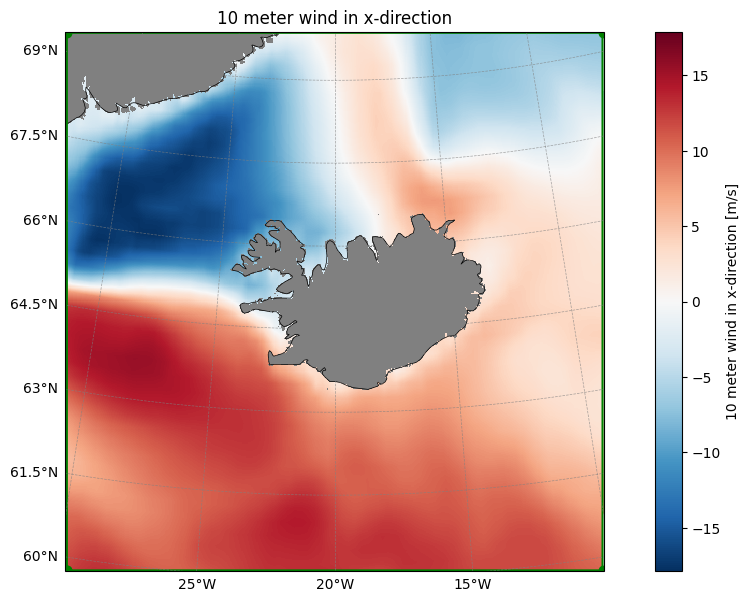

In [36]:
%%time
%%memit

surface_forcing.plot("uwnd")

## Saving as NetCDF or YAML file

Finally, we can save our tidal forcing as a netCDF file via the `.save` method.

In [37]:
filepath = "/glade/derecho/scratch/noraloose/forcing/my_surface_forcing_processes2.nc"

In [ ]:
%%time
%%memit

surface_forcing.save(filepath, group=True, parallel_write=parallel_write)

INFO - Writing the following NetCDF files:
/glade/derecho/scratch/noraloose/forcing/my_surface_forcing_processes2_201201.nc
/glade/derecho/scratch/noraloose/forcing/my_surface_forcing_processes2_201202.nc
/glade/derecho/scratch/noraloose/forcing/my_surface_forcing_processes2_201203.nc
/glade/derecho/scratch/noraloose/forcing/my_surface_forcing_processes2_201204.nc
/glade/derecho/scratch/noraloose/forcing/my_surface_forcing_processes2_201205.nc
/glade/derecho/scratch/noraloose/forcing/my_surface_forcing_processes2_201206.nc
/glade/derecho/scratch/noraloose/forcing/my_surface_forcing_processes2_201207.nc
/glade/derecho/scratch/noraloose/forcing/my_surface_forcing_processes2_201208.nc
/glade/derecho/scratch/noraloose/forcing/my_surface_forcing_processes2_201209.nc
/glade/derecho/scratch/noraloose/forcing/my_surface_forcing_processes2_201210.nc
/glade/derecho/scratch/noraloose/forcing/my_surface_forcing_processes2_201211.nc
/glade/derecho/scratch/noraloose/forcing/my_surface_forcing_proces

# Profiling, Grid A (coarse mode)
## asked for 10 CPUs, dask.config.set(scheduler="threads", n_workers=10)

### `parallel_write = False`
```
peak memory: 5142.30 MiB, increment: 3113.12 MiB
CPU times: user 49min 15s, sys: 4min 14s, total: 53min 30s
Wall time: 21min 59s
```

### `parallel_write = True`
```
peak memory: 12273.18 MiB, increment: 10389.64 MiB
CPU times: user 46min 59s, sys: 3min 13s, total: 50min 12s
Wall time: 19min 34s
```

## asked for 10 CPUs, dask.config.set(scheduler="processes", n_workers=10)
### `parallel_write = False`
fails with 
```
RuntimeError: Lock objects should only be shared between processes through inheritance
```


## asked for 10 CPUs, 
```
client = Client()
```
5 workers, 10 threads

### `parallel_write = False`
```
peak memory: 2931.58 MiB, increment: 1167.08 MiB
CPU times: user 42min 13s, sys: 55.4 s, total: 43min 9s
Wall time: 46min 59s
```

### `parallel_write = True`
